# 1.1 사이킷런과 머신러닝

## 1.1.3 사이킷런의 의사결정나무 알고리즘 알아보기

- https://scikit-learn.org/stable/modules/tree.html

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
X = [[0, 0], [1, 1]]
Y = [0, 1]

In [23]:
# 모델 선언 및 학습
clf = DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [24]:
# model.predict() : 학습된 모델을 갖고서 새로운 데이터 예측 시행
clf.predict([[2., 2.]])

array([1])

In [25]:
# model.predict_proba() : 예측된 확률값 반환
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

In [26]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

In [27]:
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

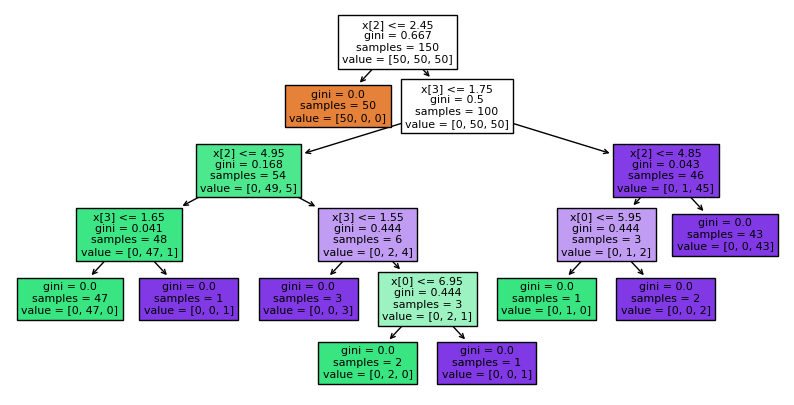

In [28]:
from sklearn import tree
import matplotlib.pyplot as plt

# 학습과정 시각화
plt.figure(figsize=(10, 5))
t = tree.plot_tree(clf, filled=True)

In [29]:
from sklearn.tree import export_text

iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



# 1.2 의사결정나무로 간단한 분류 예측 모델 만들기

- [캐글 당뇨병 데이터](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)로 실습 진행

- 데이터 구성
  - Pregnancies: 임신 횟수
  - Glucose: 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
  - BloodPressure: 이완기 혈압
  - SkinThickness: 삼두근 피부 주름 두께
  - Insulin: 2시간 혈청 인슐린
  - BMI: 체질량 지수
  - DiabetesPedigreeFunction: 당뇨병 혈통 기능
  - Age: 나이
  - Outcome: 768개
    - 268개(1): 당뇨병 환자 데이터
    - 500개(0): 당뇨병 환자가 아닌 데이터

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
import warnings
warnings.filterwarnings(action='ignore')

In [31]:
# 구글 드라이브 연결
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


## 1.2.2 데이터셋 만들기

### 데이터 불러오기

In [40]:
df = pd.read_csv('/content/gdrive/MyDrive/coaching_study/study/data/diabetes.csv')

print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 학습용 데이터 및 테스트용 데이터 분할

In [44]:
split_cnt = int(len(df)*0.8)
split_cnt

614

In [47]:
# 학습용 0.8 / 테스트용 0.2 비율로 분할
train = df[:split_cnt].copy()
test = df[split_cnt:].copy()

print(f'train {train.shape} / test {test.shape}')

train (614, 9) / test (154, 9)


In [50]:
# feature와 target으로 나누기
feature_names = df.columns[:-1].tolist()
target_name = df.columns[-1]

print('feature:', feature_names)
print('target:', target_name)

feature: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target: Outcome


In [51]:
X_train = train[feature_names]
y_train = train[target_name]

print(X_train.shape, y_train.shape)

(614, 8) (614,)


In [52]:
X_test = test[feature_names]
y_test = test[target_name]

print(X_test.shape, y_test.shape)

(154, 8) (154,)


## 1.2.3 의사결정나무로 학습과 예측하기

In [55]:
from sklearn.tree import DecisionTreeClassifier

# 모델 선언및 학습
decision_model = DecisionTreeClassifier()
decision_model.fit(X_train, y_train)

# 예측
y_pred = decision_model.predict(X_test)
y_pred[:5]

array([1, 0, 1, 0, 1])

## 1.2.4 모델 시각화 및 성능 측정

### 시각화

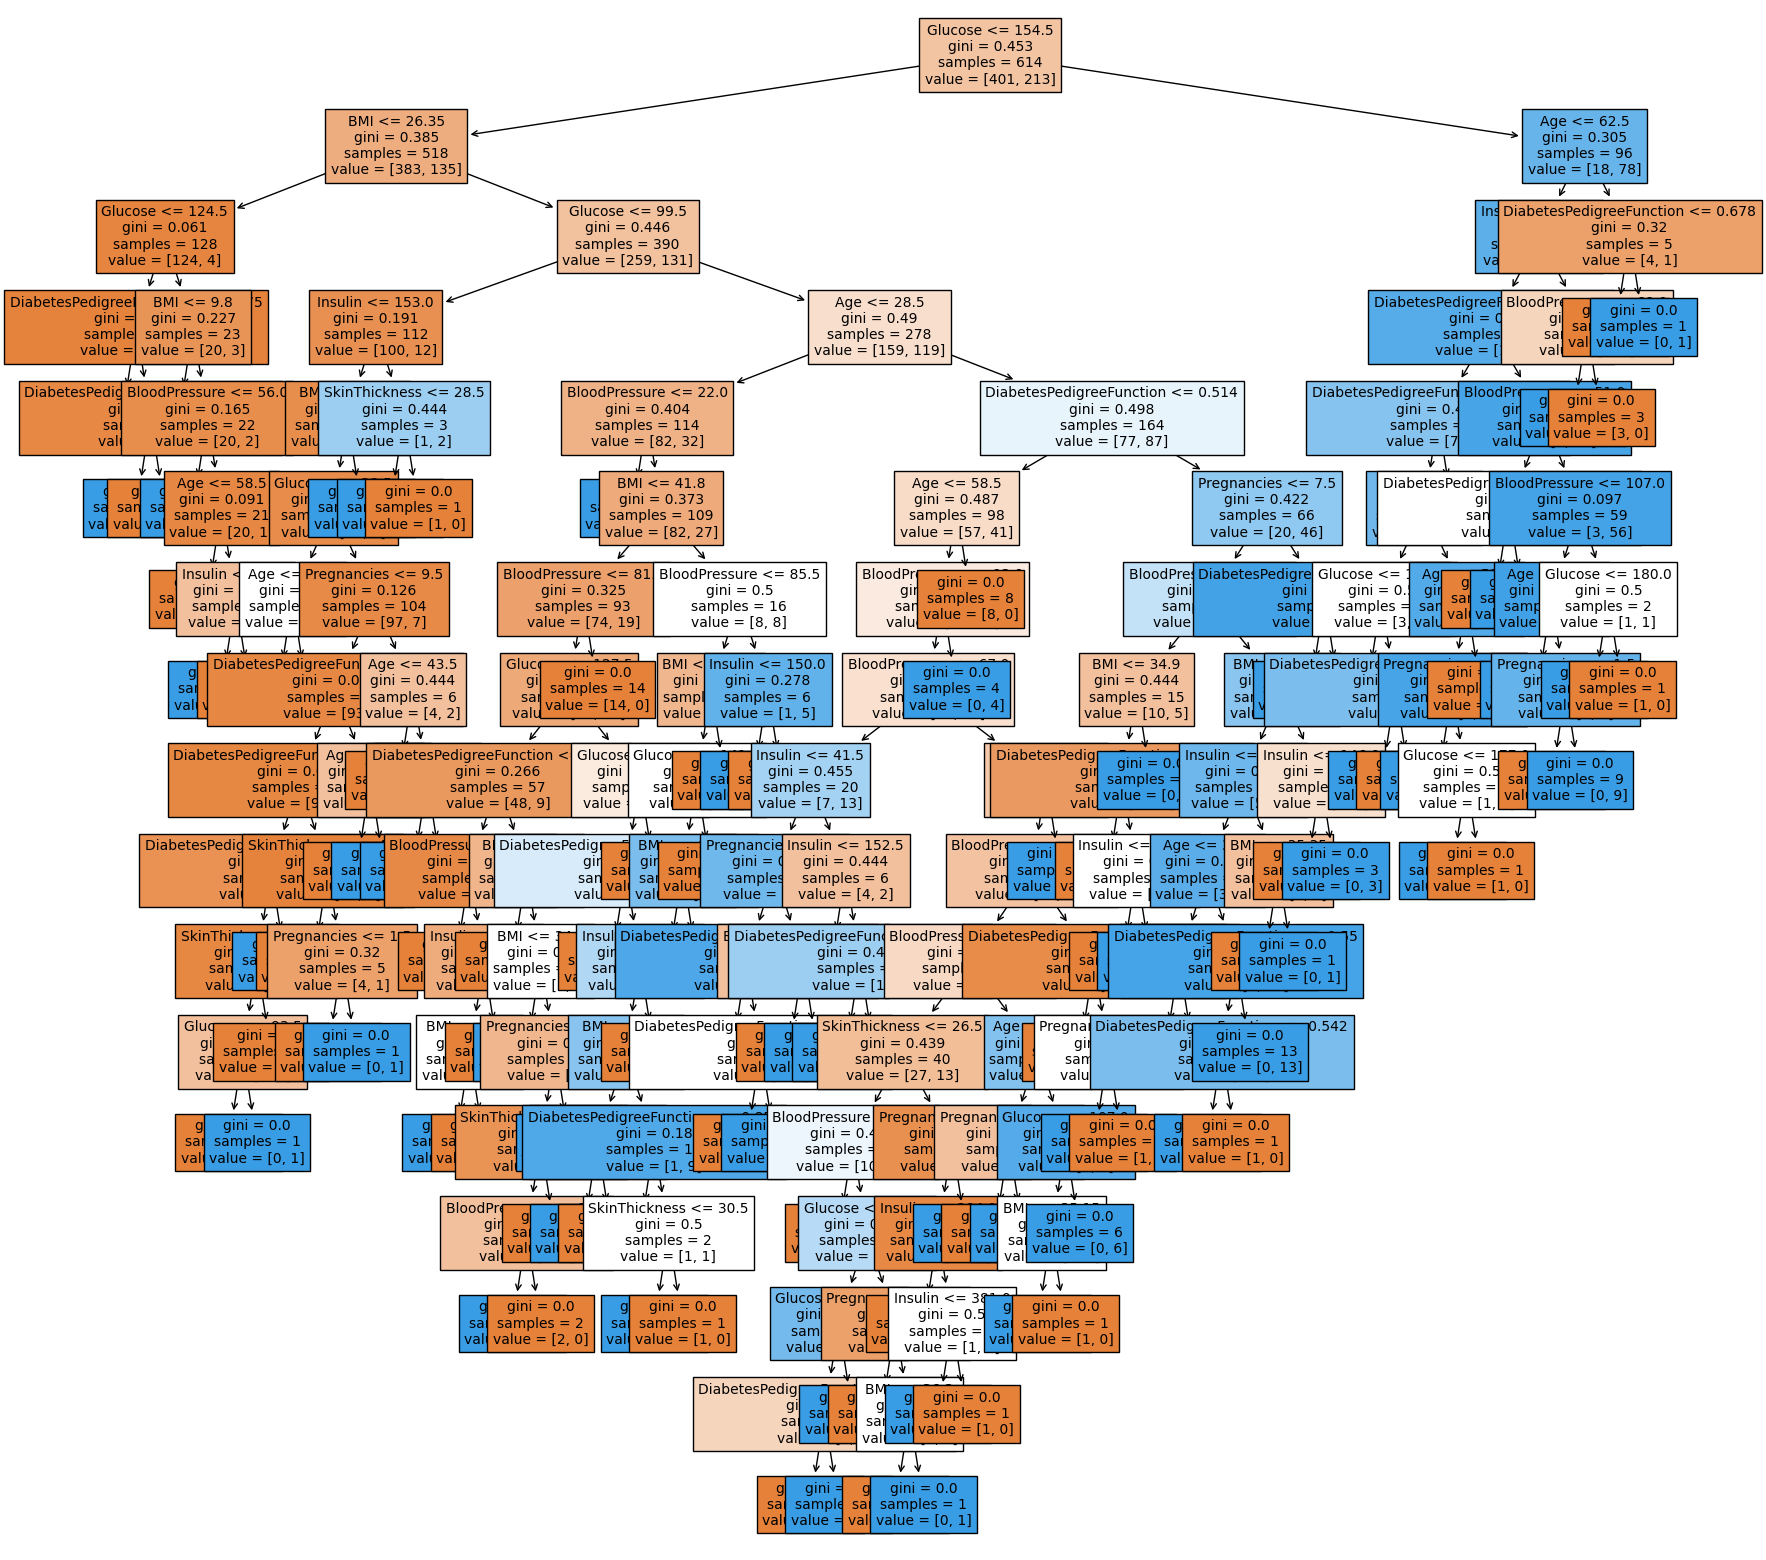

In [57]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(decision_model,feature_names=feature_names,
                 filled=True, fontsize=10)

In [ ]:
# graphviz 사용하기 위한 준비
!apt install libgraphviz-dev
!pip install pygraphviz

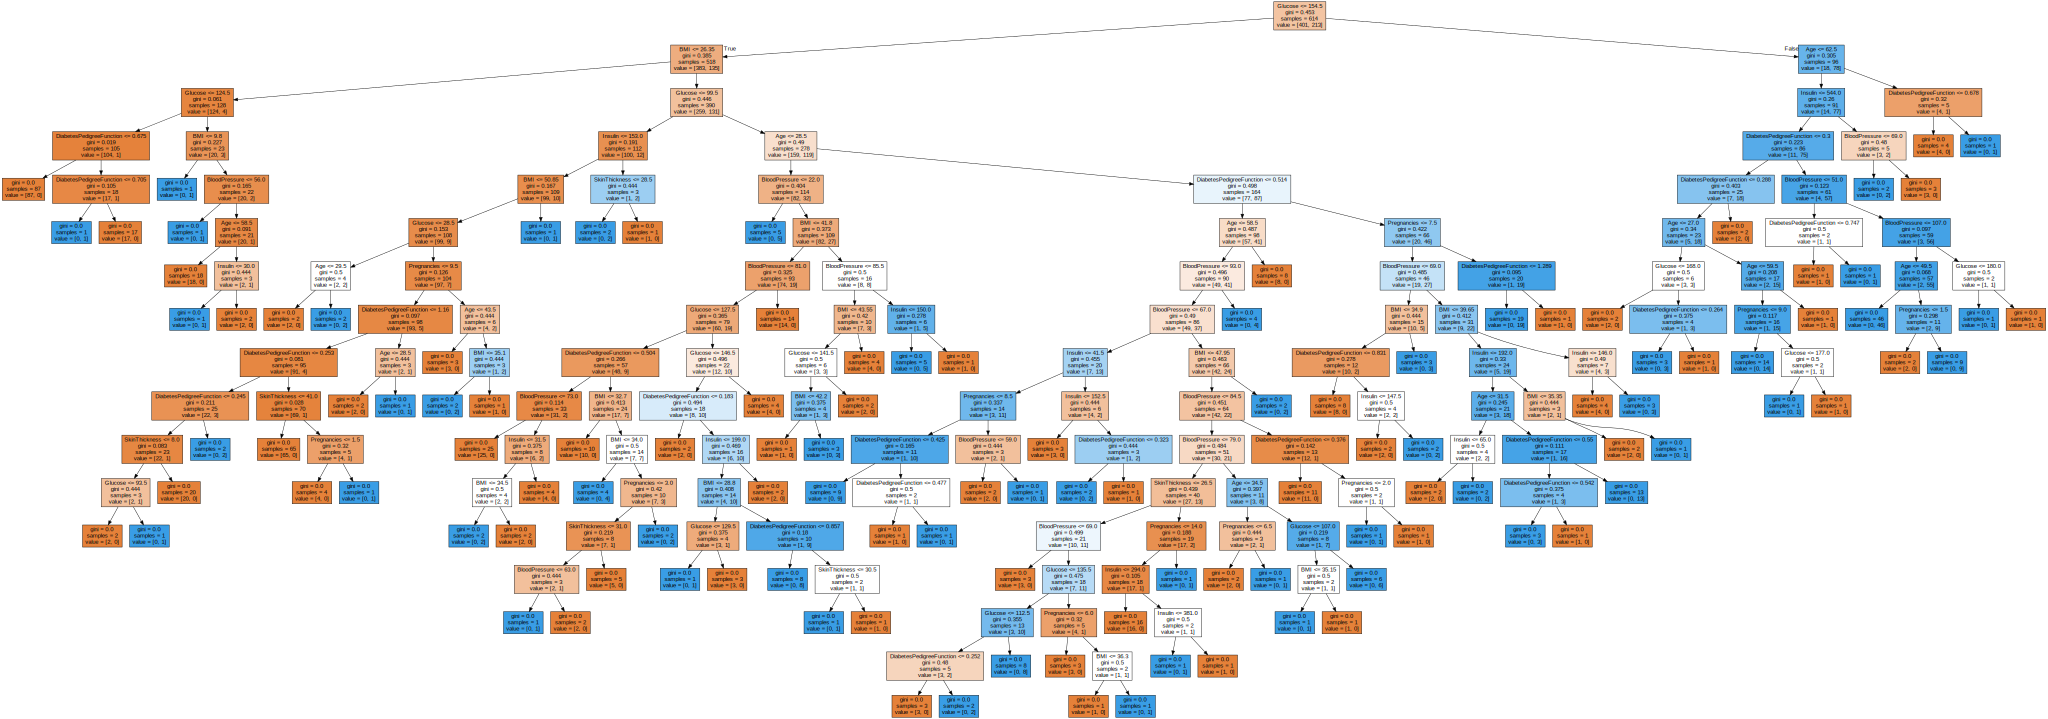

In [60]:
import graphviz
from sklearn.tree import export_graphviz

tree = export_graphviz(decision_model, feature_names=feature_names,
                       filled=True)

graphviz.Source(tree)

### feature importance

In [62]:
importance = decision_model.feature_importances_
print(importance)

[0.06814636 0.30812453 0.11857704 0.02586459 0.08494193 0.17055731
 0.12776246 0.0960258 ]


<Axes: >

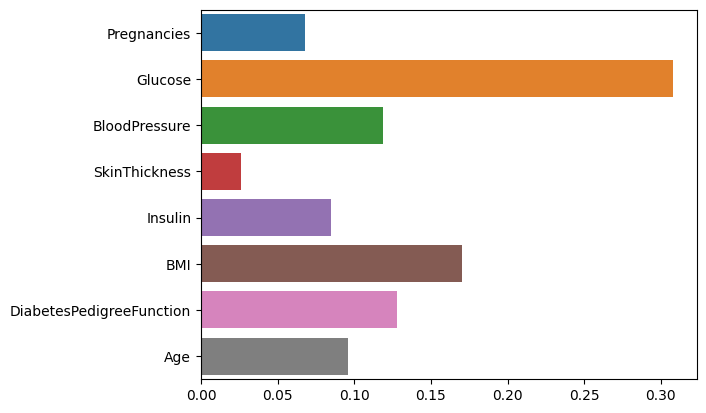

In [64]:
sns.barplot(x=importance, y=feature_names)

# Glucose > BMI > Diabets 순으로 중요도가 높음

### 정확도 측정

In [68]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print(f'accuracy score: {round(acc*100, 2)}%')

accuracy score: 75.32%


In [ ]:
# EDA를 진행하면 성능을 더 높일 수 있을 듯 하다.